In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from datetime import datetime
import time
import cv2
import pandas as pd
import pickle

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential , load_model
from keras.callbacks import ModelCheckpoint , EarlyStopping
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

In [2]:
FixedLabels =[#'Speed limit (30kmph)',
              #'Speed limit (60kmph)',
              'Stop',
              'Turn right ahead',
              'Turn left ahead',
              'Negative'
             ]

size = 50

In [3]:
PATH_1 = 'D:/Data/Traffic Signs/Custom_2/'

In [4]:
def LoadData(PATH1,size=size,channels=3,k_size=3) :
    X = []
    Y = []
    #lower red
    lower_red = np.array([0,50,50])
    upper_red = np.array([10,255,255])

    #upper red
    lower_red2 = np.array([170,50,50])
    upper_red2 = np.array([180,255,255])
    kernel = np.ones((k_size,k_size),np.float32)/k_size**2
    cou = 5
    if PATH1 is not None :
        for i in os.listdir(PATH1) :
            print(i,end=" -> ")
            if i in FixedLabels :
                for j in os.listdir(PATH1 + '/' + i) :
                    try :
                        img = cv2.imread(PATH1+ '/' + i + '/' + j)
                        img = cv2.resize(img,(size,size))
                        datagen = ImageDataGenerator(rotation_range=10,brightness_range=[.2,1.25])
                        it = datagen.flow(np.expand_dims(img,axis=0), batch_size=1)
                        for l in range(cou):
                            batch = it.next()
                            image = batch[0].astype('uint8')
#                             img1 = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
#                             mask = cv2.inRange(img1, lower_red, upper_red)
#                             img1 = cv2.bitwise_and(img1,img1, mask= mask)
#                             img1 = cv2.filter2D(img1,-1,kernel)
#                             X.append(img1)
                            X.append(image)
                            Y.append(FixedLabels.index(i))
#                             img1 = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
#                             mask = cv2.inRange(img1, lower_red2, upper_red2)
#                             img1 = cv2.bitwise_and(img1,img1, mask= mask)
#                             img1 = cv2.filter2D(img1,-1,kernel)
#                             X.append(img1)
#                             Y.append(FixedLabels.index(i))
#                         X.append(img)
#                         Y.append(FixedLabels.index(i))
                    except Exception as e :
                        print(e)
                        pass
            print(f'{len(Y)}')

    X , Y = np.array(X)/255. , np.array(Y)
    return X , Y

In [5]:
X_train , Y_train = LoadData(PATH_1)#,PATH_2,PATH_Test)

Negative -> 3900
Speed limit (30kmph) -> 6820
Speed limit (60kmph) -> 10315
Stop -> 13435
Turn left ahead -> 16735
Turn right ahead -> 19735


In [6]:
print(X_train.shape , Y_train.shape)

(19735, 50, 50, 3) (19735,)


In [7]:
loc = 'D:/CNN_1.0/Dataset_50_6.obj'

# X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, 
#                                                     test_size=0.3,
#                                                     shuffle=True,
#                                                     random_state=42)

Data = ( X_train , Y_train , FixedLabels )
f = open(loc , 'wb')
pickle.dump(Data , f)

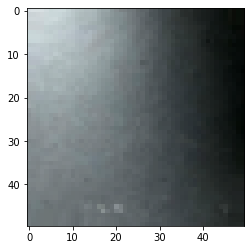

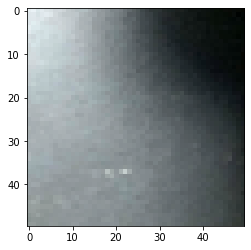

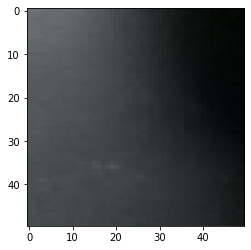

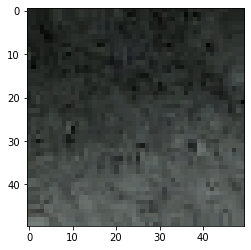

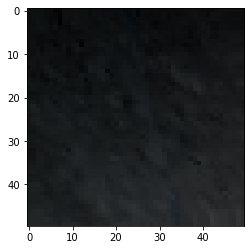

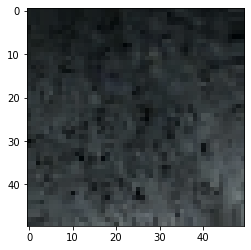

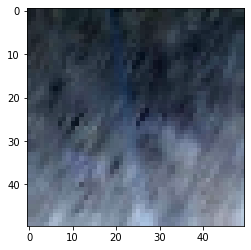

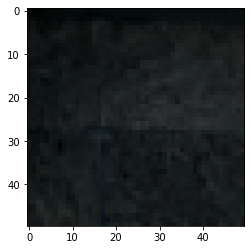

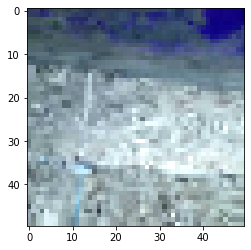

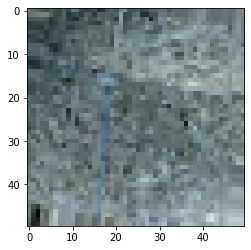

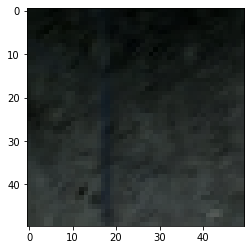

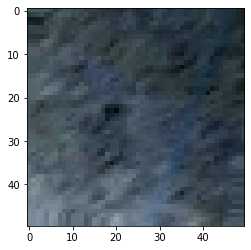

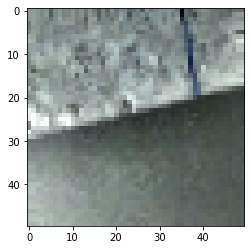

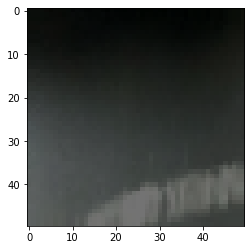

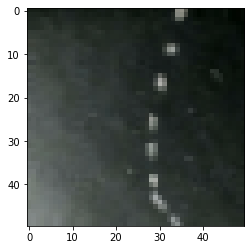

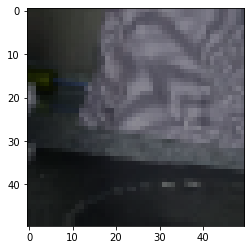

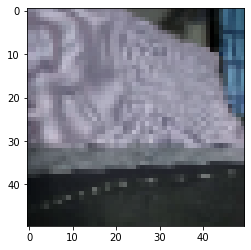

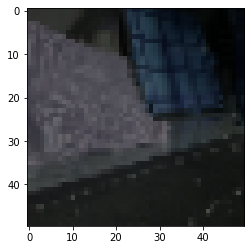

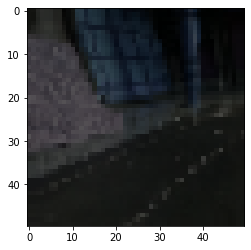

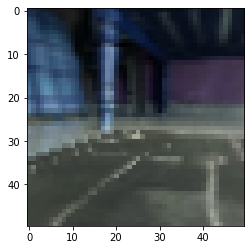

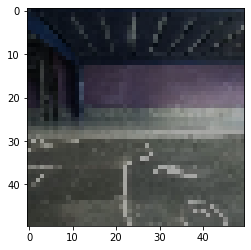

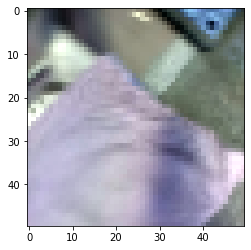

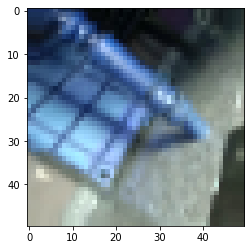

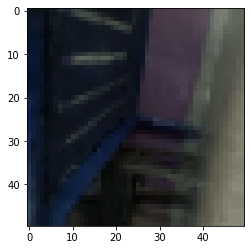

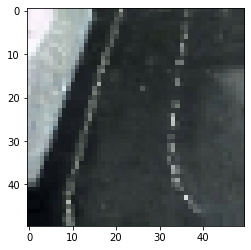

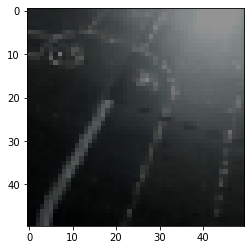

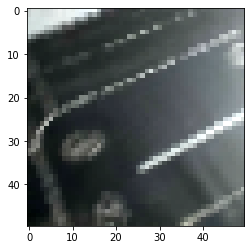

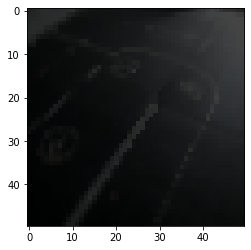

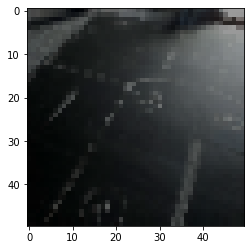

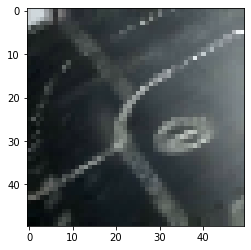

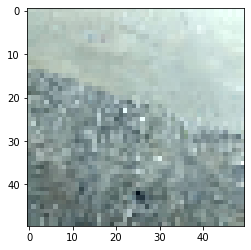

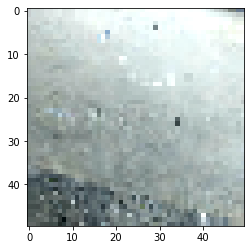

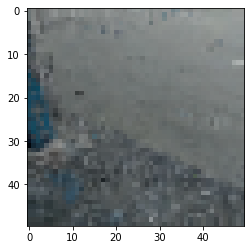

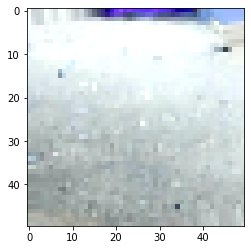

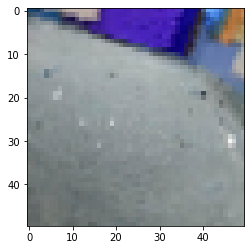

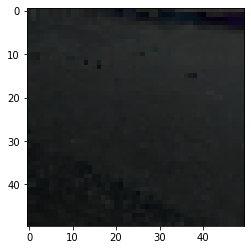

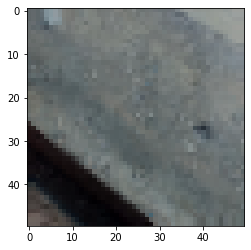

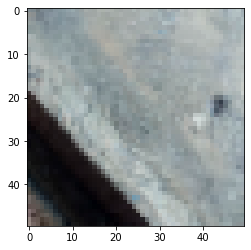

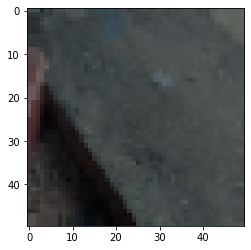

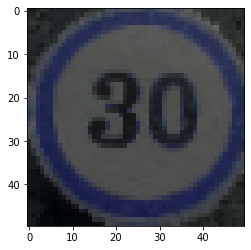

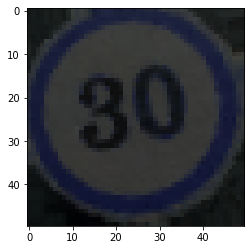

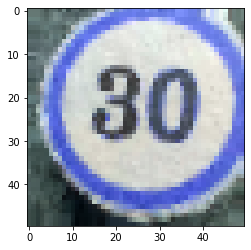

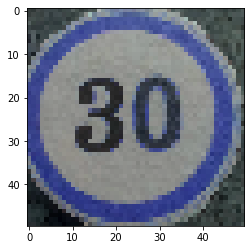

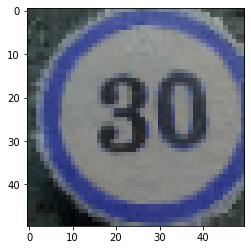

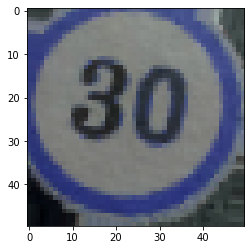

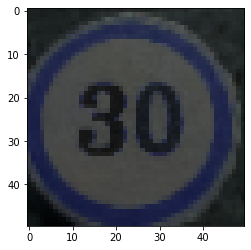

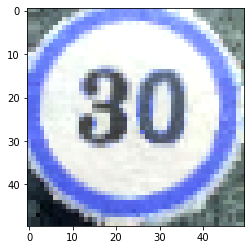

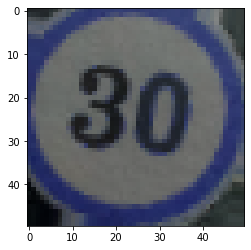

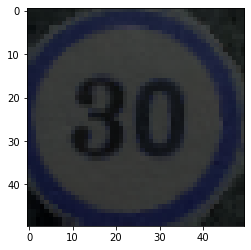

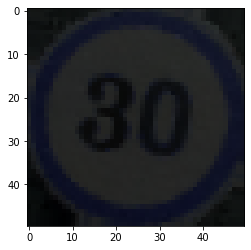

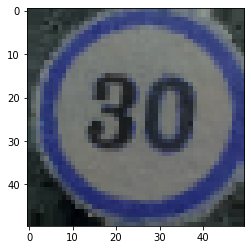

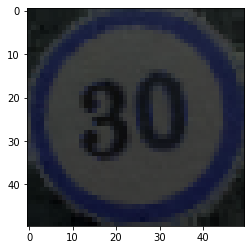

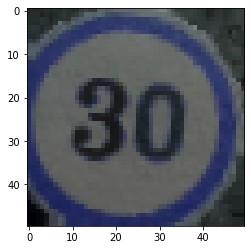

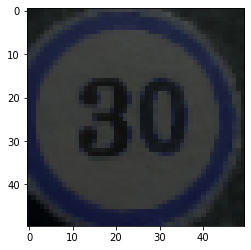

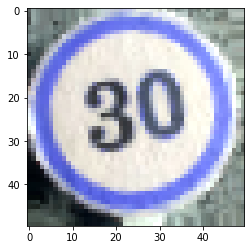

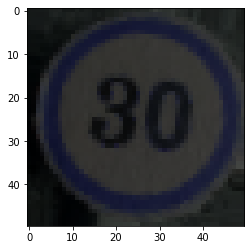

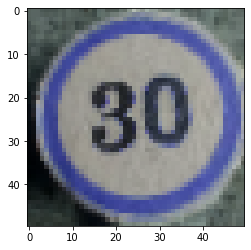

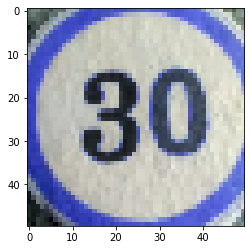

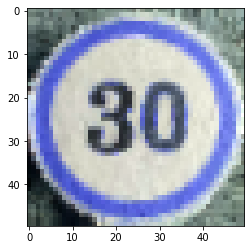

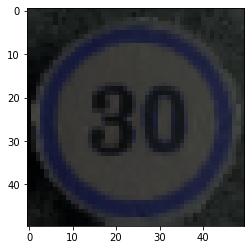

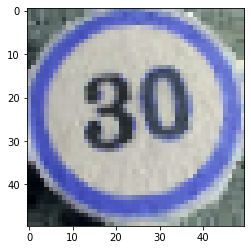

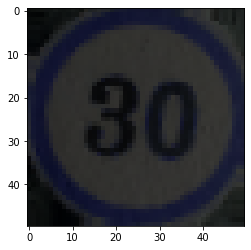

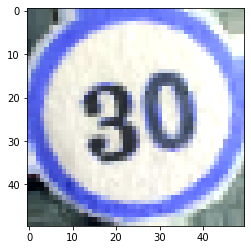

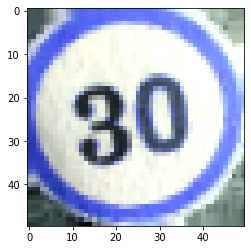

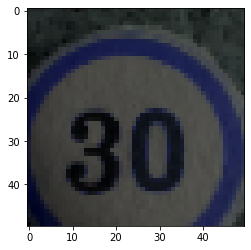

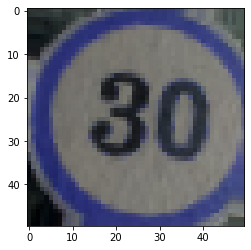

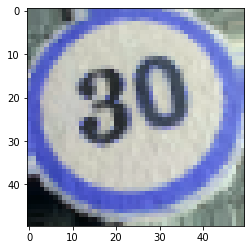

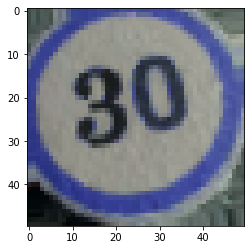

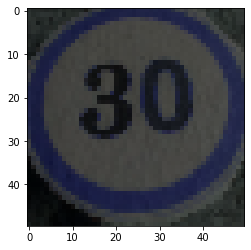

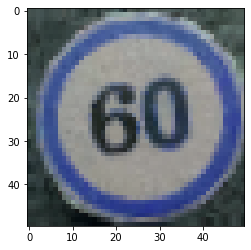

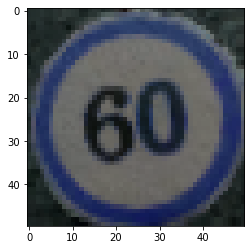

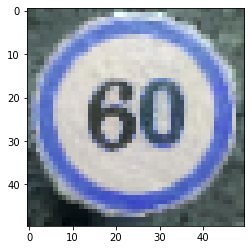

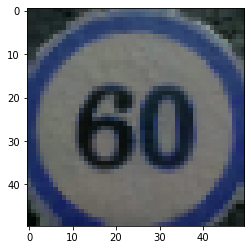

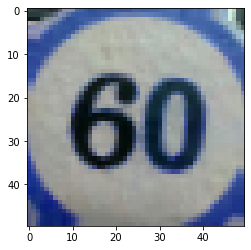

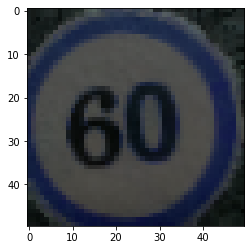

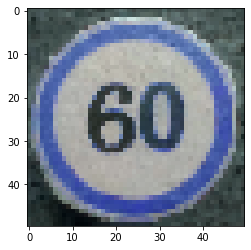

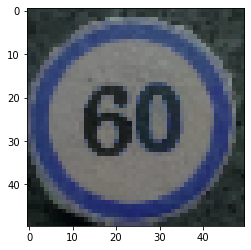

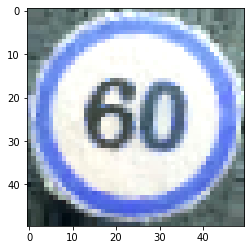

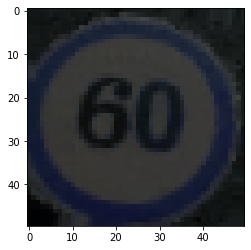

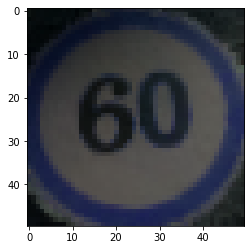

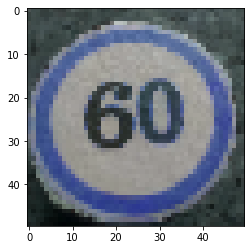

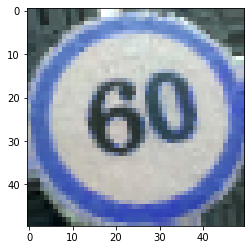

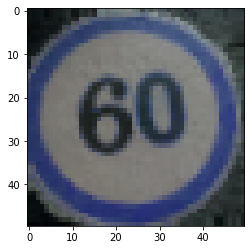

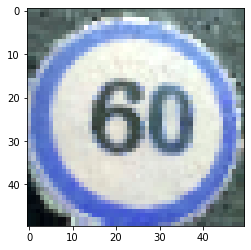

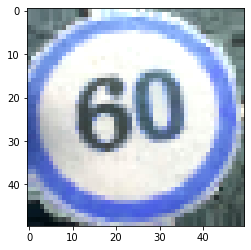

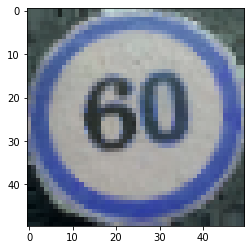

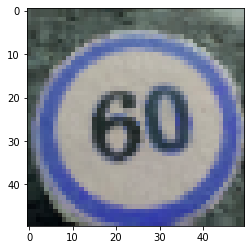

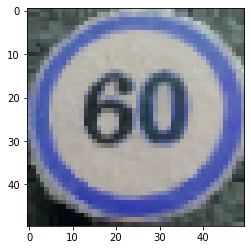

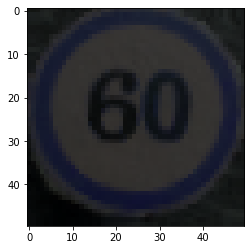

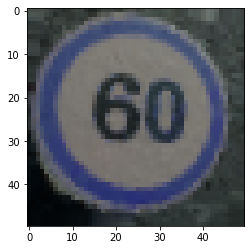

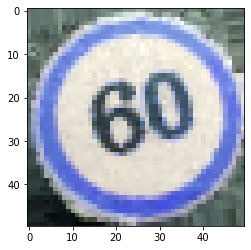

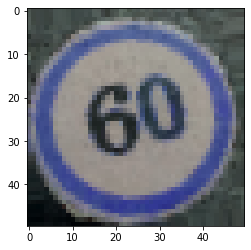

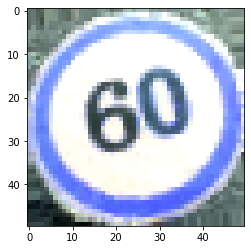

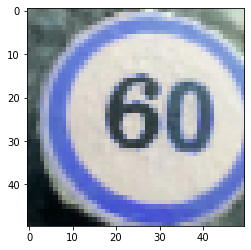

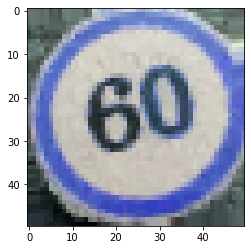

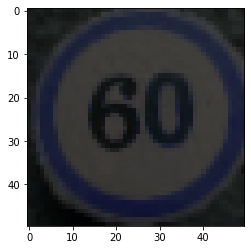

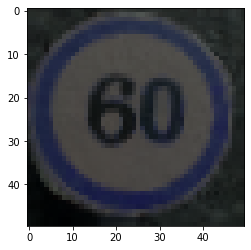

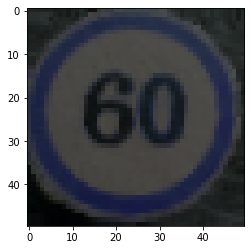

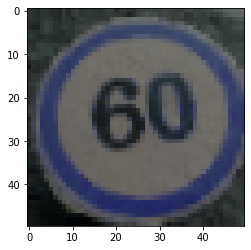

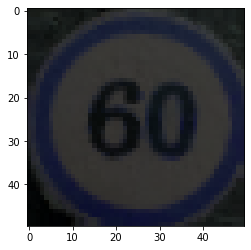

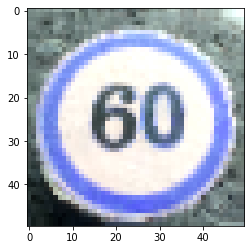

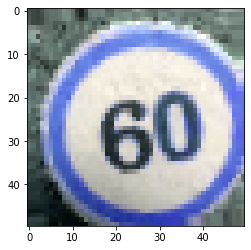

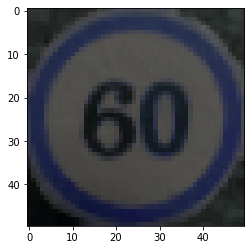

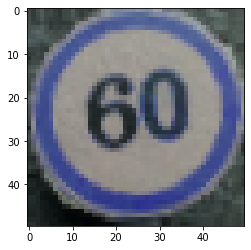

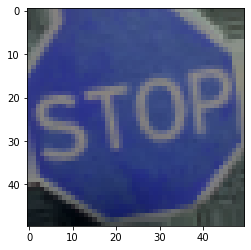

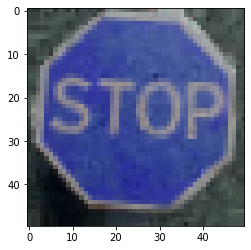

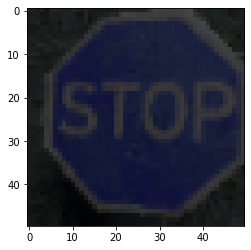

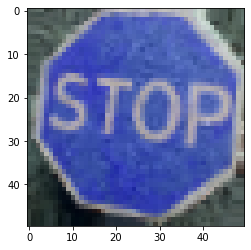

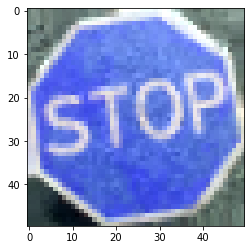

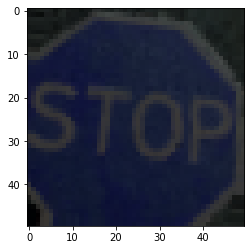

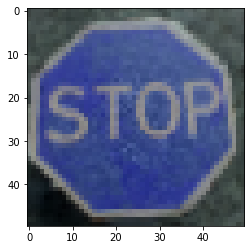

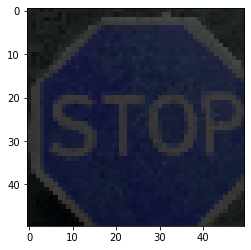

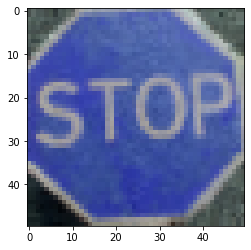

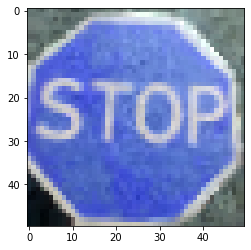

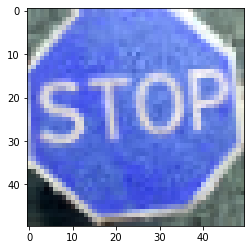

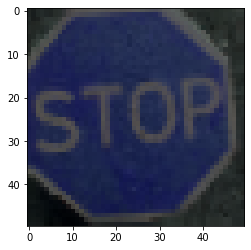

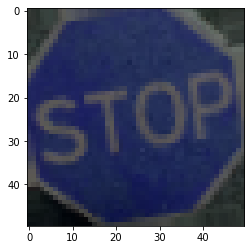

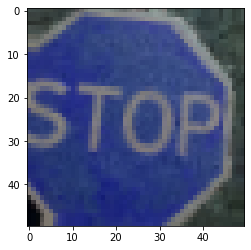

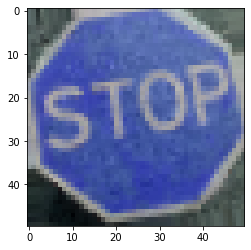

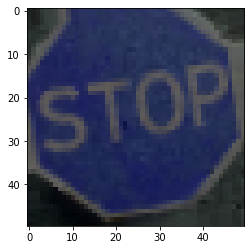

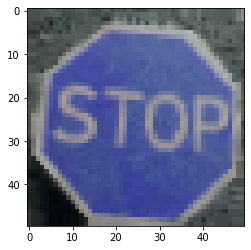

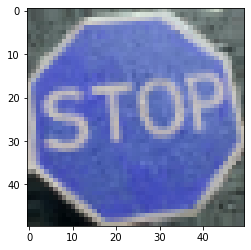

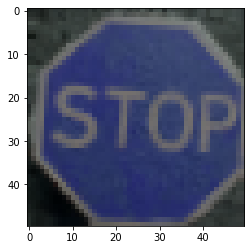

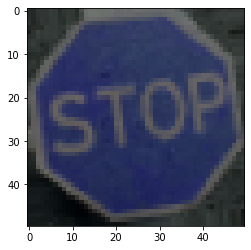

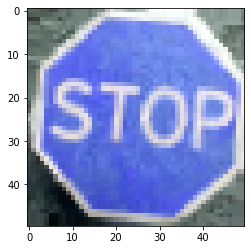

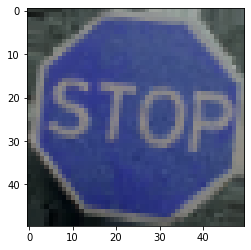

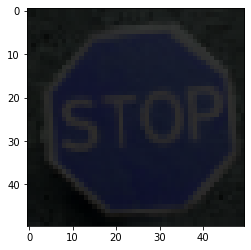

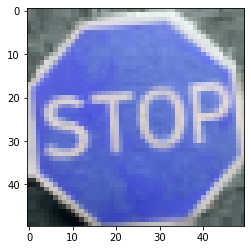

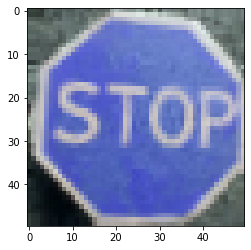

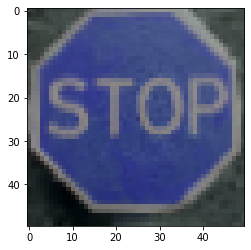

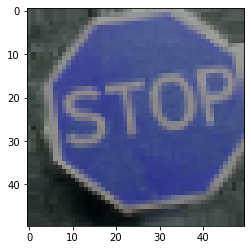

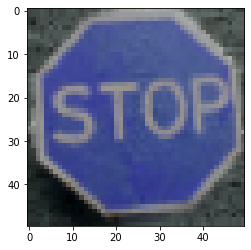

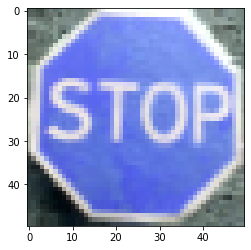

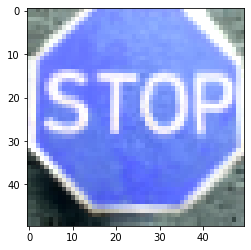

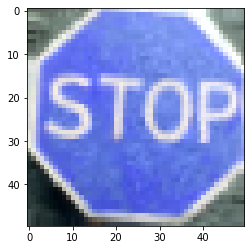

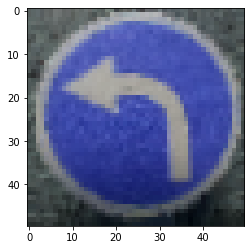

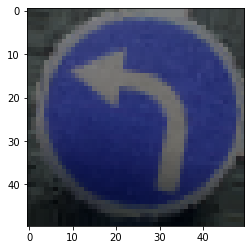

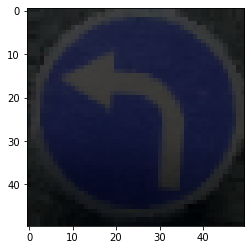

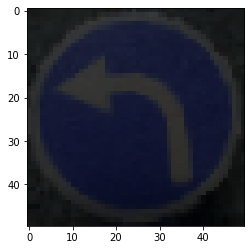

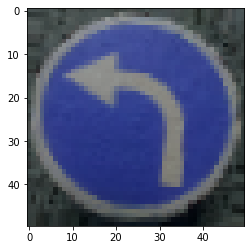

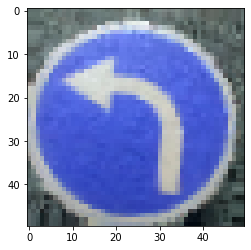

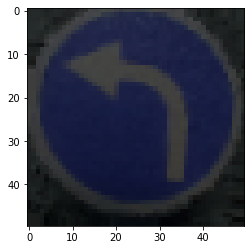

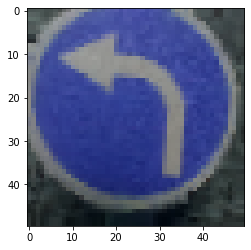

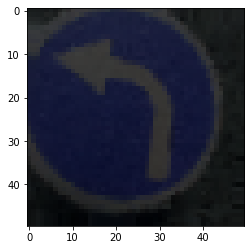

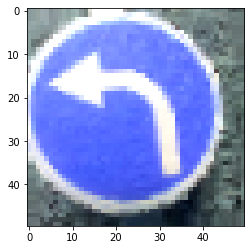

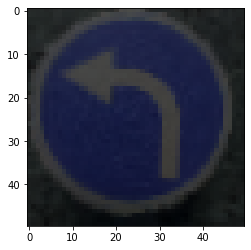

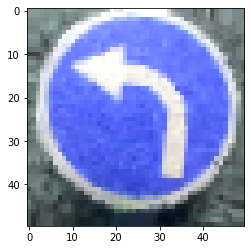

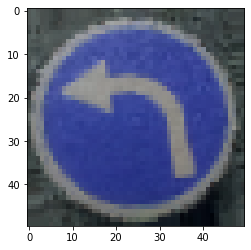

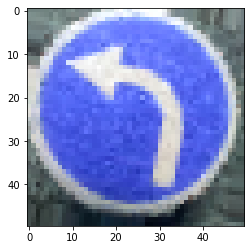

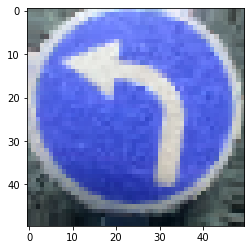

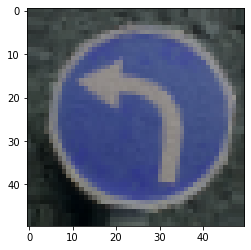

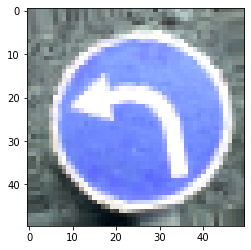

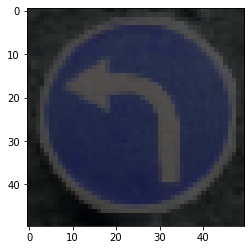

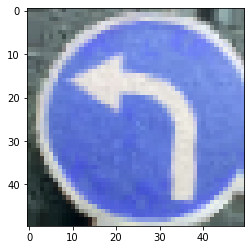

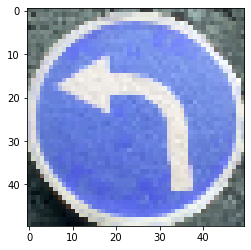

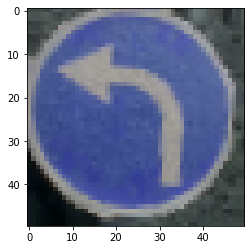

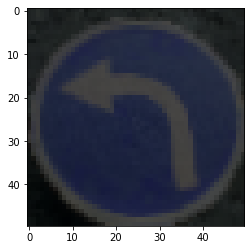

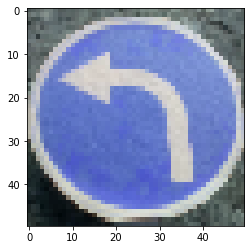

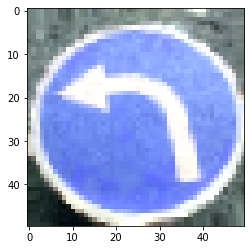

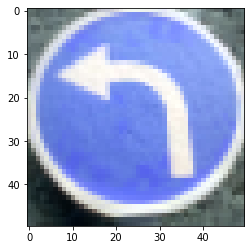

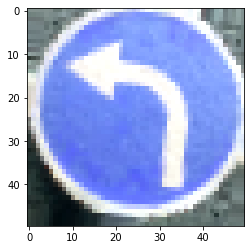

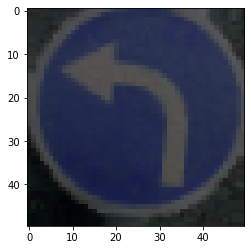

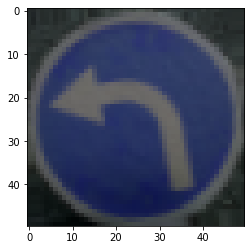

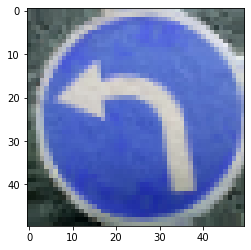

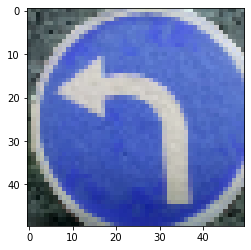

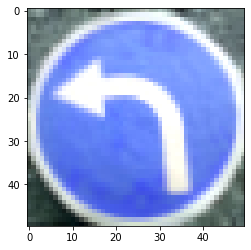

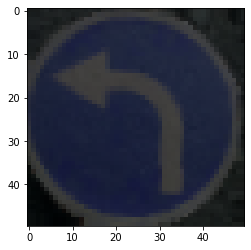

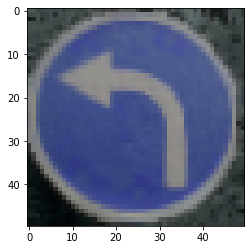

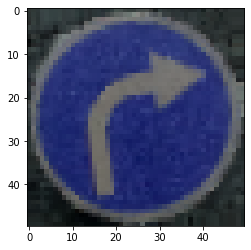

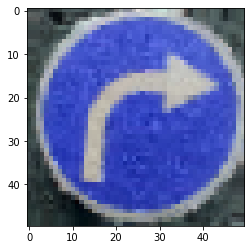

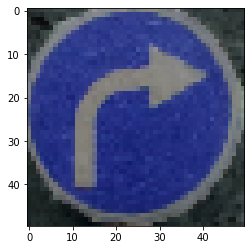

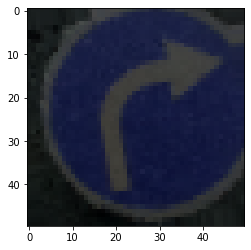

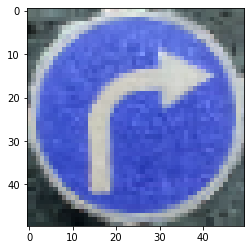

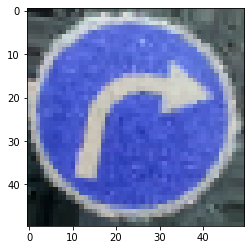

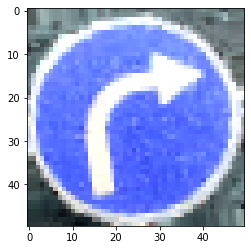

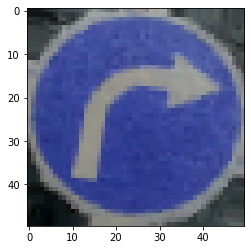

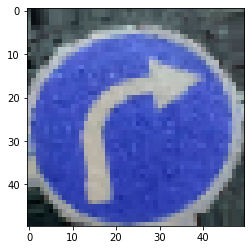

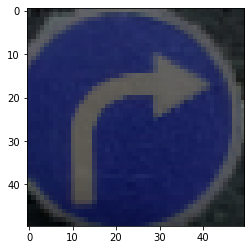

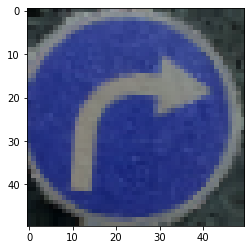

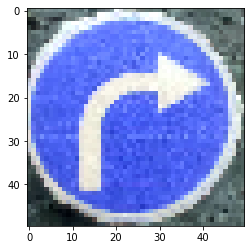

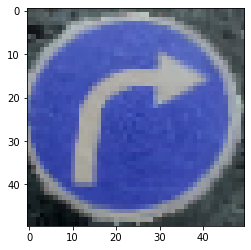

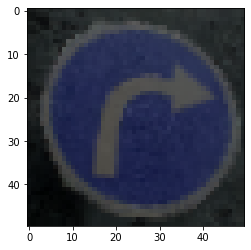

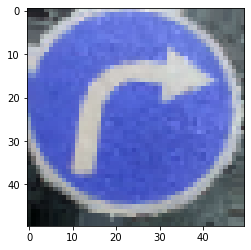

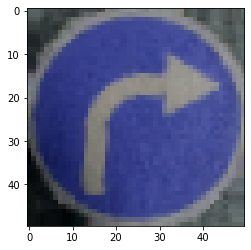

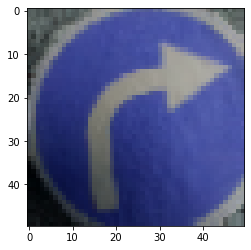

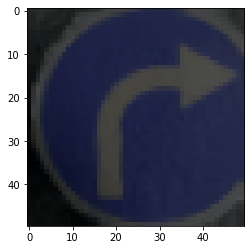

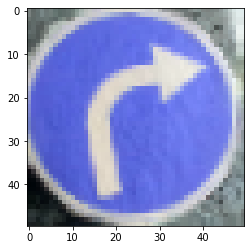

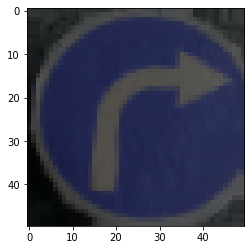

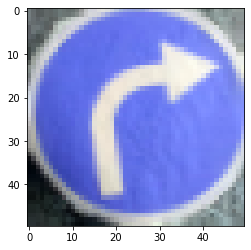

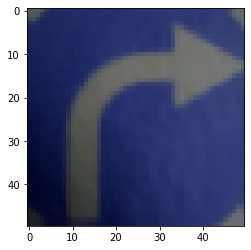

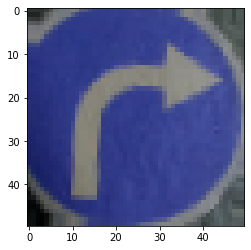

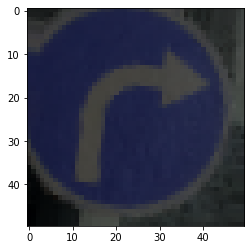

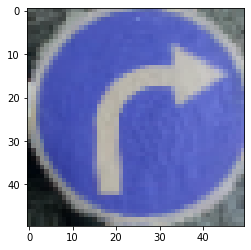

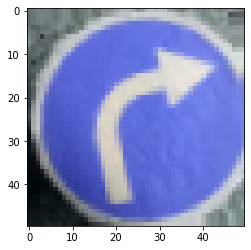

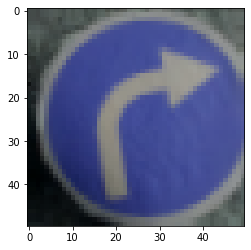

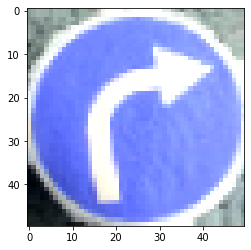

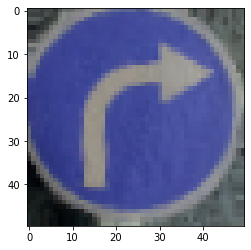

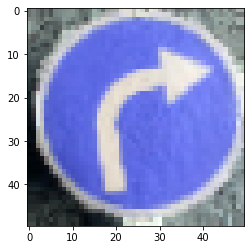

In [8]:
for i in range(0,len(Y_train),100) :
    plt.imshow(X_train[i])
    plt.show()

In [9]:
13320 - 13320 * .991592

111.99455999999918

In [10]:
4396 - 4396 * .992948

31.000591999999415

In [11]:
a = {}
a[0] = {}

In [12]:
a[0]['0'] = 0
a[0]['1'] = 1

In [13]:
a

{0: {'0': 0, '1': 1}}